# Iris Flower Classification Problem

In [107]:
#import the libraries
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import model_selection
import numpy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [108]:
#load the dataset
dataset = pd.read_csv("iris.csv")
dataset.columns = ['sepel-length','sepal-width','petal-length','petal-width','class']


In [74]:
print(dataset.shape,'\n')


(149, 5) 



In [75]:
print(dataset.describe())

       sepel-length  sepal-width  petal-length  petal-width
count    149.000000   149.000000    149.000000   149.000000
mean       5.848322     3.051007      3.774497     1.205369
std        0.828594     0.433499      1.759651     0.761292
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [76]:
print(dataset.groupby('class').size())

class
Iris-setosa        49
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [77]:
dataset.head()

,sepel-length,sepal-width,petal-length,petal-width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


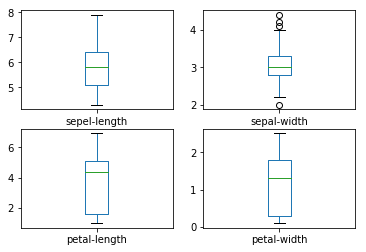

In [78]:
dataset.plot(kind='box',subplots='True',layout=(2,2),sharex=False,sharey=False)
plt.show()

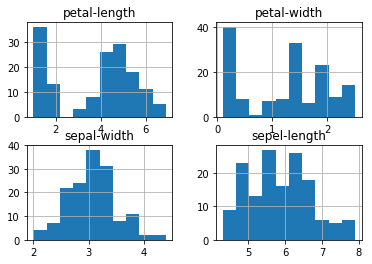

In [79]:
dataset.hist()
plt.show()

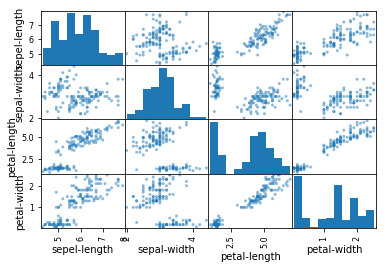

In [80]:
scatter_matrix(dataset)
plt.show()

In [81]:
#
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train,X_validation,Y_train,Y_validation = model_selection.train_test_split(X,Y,test_size=validation_size,random_state=seed)

In [112]:
kfold = model_selection.KFold(n_splits=10, random_state=7)

In [113]:
#Logistic Regression
lr_model = LogisticRegression(solver='liblinear', multi_class='ovr')
cv_result = model_selection.cross_val_score(lr_model, X_train, Y_train, cv=kfold, scoring='accuracy')
cv_result.mean()

0.9666666666666666

In [114]:
#Linear Discrimant Analysis
lda_model = LinearDiscriminantAnalysis()
cv_result = model_selection.cross_val_score(lda_model, X_train, Y_train, cv=kfold, scoring='accuracy')
cv_result.mean()

0.9833333333333332

In [116]:
#K nearest neighbour
knn_model = KNeighborsClassifier()
cv_result = model_selection.cross_val_score(knn_model, X_train, Y_train, cv=kfold, scoring='accuracy')
cv_result.mean()

0.975

In [117]:
#Decision tree
dt_model = DecisionTreeClassifier()
cv_result = model_selection.cross_val_score(dt_model, X_train, Y_train, cv=kfold, scoring='accuracy')
cv_result.mean()

0.9583333333333334

In [118]:
#Naive Bayes
nb_model = GaussianNB()
cv_result = model_selection.cross_val_score(nb_model, X_train, Y_train, cv=kfold, scoring='accuracy')
cv_result.mean()

0.95

In [119]:
#SVM
svm_model = SVC(gamma='auto')
cv_result = model_selection.cross_val_score(svm_model, X_train, Y_train, cv=kfold, scoring='accuracy')
cv_result.mean()

0.9833333333333332

In [121]:
#Testing - KNN
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9333333333333333
[[ 7  0  0]
 [ 0 11  1]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.91      0.91      0.91        11

    avg / total       0.93      0.93      0.93        30



In [122]:
#Testing - DT
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
predictions = dt.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.92      1.00      0.96        11

    avg / total       0.97      0.97      0.97        30



In [123]:
#Testing - SVM
svm = SVC(gamma='auto')
svm.fit(X_train,Y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9333333333333333
[[ 7  0  0]
 [ 0 11  1]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.91      0.91      0.91        11

    avg / total       0.93      0.93      0.93        30



In [124]:
#Testing - NB
nb = GaussianNB()
nb.fit(X_train,Y_train)
predictions = nb.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.92      1.00      0.96        11

    avg / total       0.97      0.97      0.97        30



In [125]:
#Testing - LR
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(X_train,Y_train)
predictions = lr.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 10  2]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.91      0.83      0.87        12
 Iris-virginica       0.83      0.91      0.87        11

    avg / total       0.90      0.90      0.90        30



In [126]:
#Testing - LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,Y_train)
predictions = lda.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.92      1.00      0.96        11

    avg / total       0.97      0.97      0.97        30

